<a href="https://colab.research.google.com/github/jeevanjagadish/Covid-Predictions/blob/master/covid_kar_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

In [4]:
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [3]:
pip install pycountry

     |████████████████████████████████| 10.1MB 80kB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=523dbddcb6afb614a8c735e163a99960a20cde7c833107b6d7faa6e0bf5e70f3
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [5]:
#from pywaffle import Waffle
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs
# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [6]:
url = 'https://raw.githubusercontent.com/jeevanjagadish/Covid-Predictions/master/Covid_karnataka/Covid%20cases%20in%20Karnataka.csv'
df = pd.read_csv(url)

In [7]:
df.tail

<bound method NDFrame.tail of      Patient#        Date  ... No of contacts           Hospital
0           1  2020-03-09  ...              2              RGICD
1           2  2020-03-10  ...              0              RGICD
2           3  2020-03-10  ...              0              RGICD
3           4  2020-03-10  ...              0              RGICD
4           5  2020-03-12  ...              0  Jayanagar General
..        ...         ...  ...            ...                ...
210       211  2020-04-11  ...              0         Designated
211       212  2020-04-11  ...              0         Designated
212       213  2020-04-11  ...              0         Designated
213       214  2020-04-11  ...              0         Designated
214       215  2020-04-11  ...              0         Designated

[215 rows x 15 columns]>

In [8]:
df["Patient#"]= df["Patient#"].astype(str) 
df["Age"]= df["Age"].astype(str) 
df["Linked Patient#"]= df["Linked Patient#"].astype(str) 
df['Active cases'] = df['Total cases'] - (df['Cured/Discharged/Migrated'] + df['Deaths'])
df['Active original cases'] = df['Total cases'] - (df['Cured/Discharged/Migrated'] + df['Deaths']) - df['No of contacts']
print(f'Total number of Confirmed COVID 2019 cases across Karnataka:', df['Total cases'].sum())
print(f'Total number of Active COVID 2019 cases across Karnataka:', df['Active cases'].sum())
print(f'Total number of Active original COVID 2019 cases across Karnataka:', df['Active original cases'].sum())
print(f'Total number of Contacts COVID 2019 cases across Karnataka:', df['No of contacts'].sum())
print(f'Total number of Cured/Discharged/Migrated COVID 2019 cases across Karnataka:', df['Cured/Discharged/Migrated'].sum())
print(f'Total number of Deaths due to COVID 2019  across Karnataka:', df['Deaths'].sum())
print(f'Total number of Places affected:', len(df.groupby(['Place']).sum()))
#df.groupby(['Place']).sum()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]

#df.style.apply(highlight_max,subset=['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'])
df.groupby(['Place']).sum().style.apply(highlight_max,subset=['Cured/Discharged/Migrated', 'Deaths','Total cases','Active cases','No of contacts','Active original cases'])

Total number of Confirmed COVID 2019 cases across Karnataka: 215
Total number of Active COVID 2019 cases across Karnataka: 169
Total number of Active original COVID 2019 cases across Karnataka: 66
Total number of Contacts COVID 2019 cases across Karnataka: 103
Total number of Cured/Discharged/Migrated COVID 2019 cases across Karnataka: 40
Total number of Deaths due to COVID 2019  across Karnataka: 6
Total number of Places affected: 24


,Total cases,Deaths,Cured/Discharged/Migrated,No of contacts,Active cases,Active original cases
Place,,,,,,
Bagalkote,8,1,0,5,7,2
Ballari,2,0,0,0,2,2
Belgavi,6,0,0,3,6,3
Bengaluru,65,0,21,24,44,20
Bengaluru Rural,6,0,0,1,6,5
Bengaluru-Kerala,3,0,0,1,3,2
Bhatkal,1,0,0,0,1,1
Bidar,12,0,0,3,12,9
Chikkaballapura,13,1,3,9,9,0


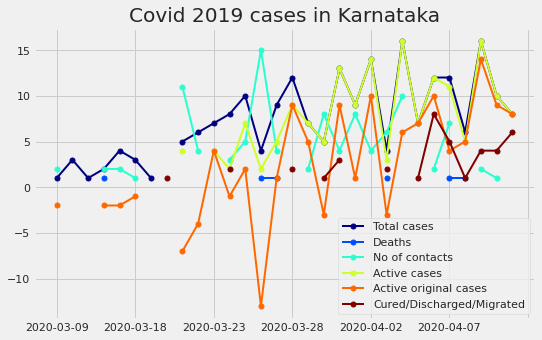

In [9]:
df_t = df.T
#print(df)
df_axes = df.copy()
df_axes1 = df_axes.groupby(['Date'],as_index=False).sum()
df_axes2 = df_axes.groupby(['Discharge Date'],as_index=False).sum()


df_axes2['Date']=df_axes2['Discharge Date']
df_axes2.drop(['Total cases','Deaths','No of contacts','Active cases', 'Active original cases','Discharge Date'], axis= 1, inplace = True)
df_axes2.set_index(['Date'], inplace=True)


df_axes1.drop(['Cured/Discharged/Migrated'], axis= 1, inplace = True)
df_axes1.set_index(['Date'],inplace=True)

df_concat = pd.concat([df_axes1, df_axes2], axis=1, sort=True)
df_concat.replace(0, np.nan, inplace=True)
df_concat.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Covid 2019 cases in Karnataka')

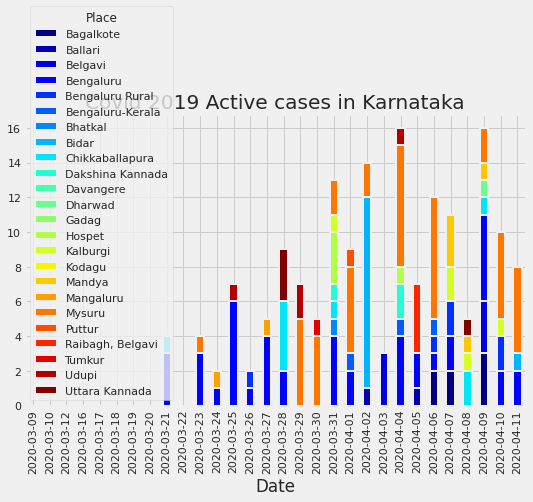

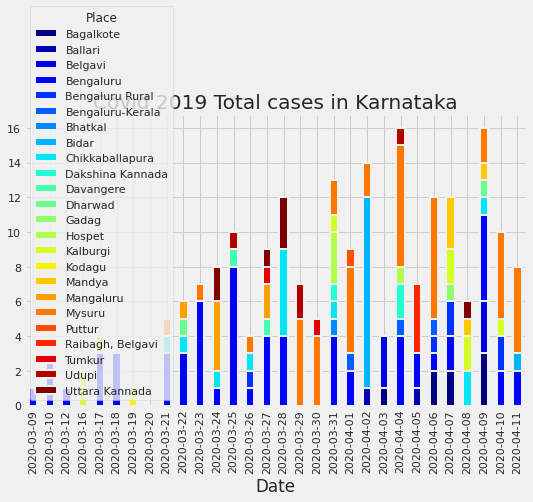

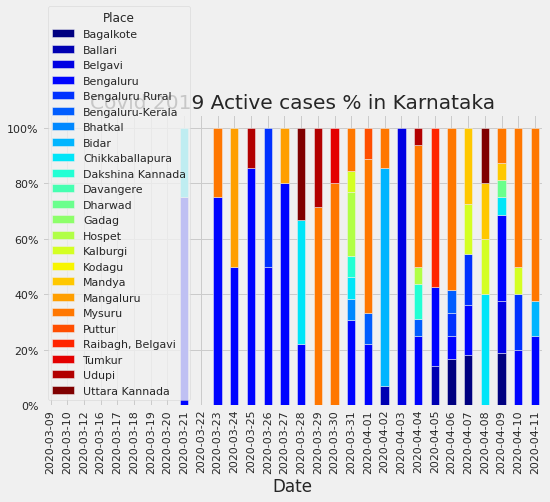

In [10]:
#print(df)
df_axes = df.copy()
df_axes1 = df_axes.groupby(['Place','Date'],as_index=False).sum()
df_axes2 = df_axes.groupby(['Discharge Date','Place'],as_index=False).sum()


df_axes2['Date']=df_axes2['Discharge Date']
df_axes2.drop(['Total cases','Deaths','No of contacts','Active cases', 'Active original cases','Discharge Date'], axis= 1, inplace = True)
df_axes2.set_index(['Place','Date'], inplace=True)


df_axes1.drop(['Cured/Discharged/Migrated'], axis= 1, inplace = True)
df_axes1.set_index(['Place','Date'],inplace=True)

df_concat = pd.concat([df_axes1, df_axes2], axis=1, sort=True)
df_concat.replace(0, np.nan, inplace=True)
#df.reset_index().plot(x="b",y="c")
#df_concat.reset_index().plot(y="Place",lw=2, colormap='jet', marker='.', markersize=10, title='Covid 2019 cases in Karnataka')

#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#df_concat
df_concat['Active cases'].groupby(['Date','Place']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Active cases in Karnataka')
#print(df_concat.groupby(['Date','Place']).sum())
df_concat['Total cases'].groupby(['Date','Place']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Total cases in Karnataka')
df_concat['Active cases'].groupby(['Date','Place']).sum().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,colormap='jet', title='Covid 2019 Active cases % in Karnataka')
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

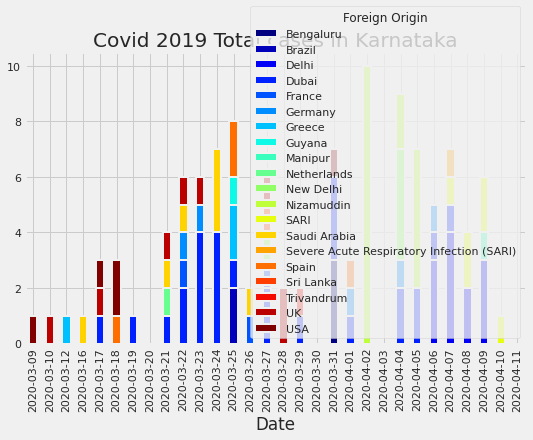

In [11]:
df_axes = df.copy()
df_axes["Age"]= df_axes["Age"].astype(int) 
bins= [0,20,40,60,80,110]
labels = ['0-20','21-40','41-60','61-80','81-110']
df_axes['AgeGroup'] = pd.cut(df_axes['Age'], bins=bins, labels=labels, right=False)
#df_axes["AgeGroup"]= df_axes["AgeGroup"].astype(str) 
#df_axes["Age"]= df_axes["Age"].astype(str) 
#df_axes['Date'] = df_axes['Date'].astype('datetime64[ns]')
#df_axes['Origin Dates'] = df_axes['Origin Dates'].astype('datetime64[ns]')
#df_axes['AgeGroup'][ df_axes.Age < 21 ] = '1-20'
#df_axes['AgeGroup'][ df_axes.Age > 20 & df_axes.Age < 41 ] = '21-40'
#df_axes['AgeGroup'][ df_axes.Age > 40 & df_axes.Age < 61 ] = '41-60'
#df_axes['AgeGroup'][ df_axes.Age > 60 & df_axes.Age < 81 ] = '61-80'
#df_axes['AgeGroup'][ df_axes.Age > 80  ] = '81-100+'
df_axes1 = df_axes.groupby(['Place','AgeGroup','Gender','Foreign Origin','Date'],as_index=False).sum()
df_axes2 = df_axes.groupby(['Discharge Date','AgeGroup','Gender','Foreign Origin','Place'],as_index=False).sum()


df_axes2['Date']=df_axes2['Discharge Date']
df_axes2.drop(['Total cases','Deaths','No of contacts','Active cases', 'Active original cases','Discharge Date','Age'], axis= 1, inplace = True)
df_axes2.set_index(['Place','AgeGroup','Gender','Foreign Origin','Date'], inplace=True)


df_axes1.drop(['Cured/Discharged/Migrated','Age'], axis= 1, inplace = True)
df_axes1.set_index(['Place','AgeGroup','Gender','Foreign Origin','Date'],inplace=True)

df_concat = pd.concat([df_axes1, df_axes2], axis=1, sort=True)
df_concat.replace(0, np.nan, inplace=True)
df_concat['Total cases'].groupby(['Date','Foreign Origin']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Total cases in Karnataka')


In [12]:
df


,Patient#,Date,Place,Age,Gender,Foreign Origin,Origin Dates,Linked Patient#,Death date,Discharge Date,Total cases,Deaths,Cured/Discharged/Migrated,No of contacts,Hospital,Active cases,Active original cases
0,1,2020-03-09,Bengaluru,40,M,USA,2020-03-01,nan,NaN,2020-03-28,1,0,1,2,RGICD,0,-2
1,2,2020-03-10,Bengaluru,47,F,NaN,NaN,1.0,NaN,2020-03-24,1,0,1,0,RGICD,0,0
2,3,2020-03-10,Bengaluru,13,F,NaN,NaN,1.0,NaN,2020-03-28,1,0,1,0,RGICD,0,0
3,4,2020-03-10,Bengaluru,50,M,UK,NaN,nan,NaN,2020-03-24,1,0,1,0,RGICD,0,0
4,5,2020-03-12,Bengaluru,26,M,Greece,2020-03-06,nan,NaN,2020-03-20,1,0,1,0,Jayanagar General,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,2020-04-11,Bidar,50,F,NaN,NaN,122.0,NaN,NaN,1,0,0,0,Designated,1,1
211,212,2020-04-11,Mysuru,27,M,NaN,NaN,88.0,NaN,NaN,1,0,0,0,Designated,1,1
212,213,2020-04-11,Mysuru,31,M,NaN,NaN,88.0,NaN,NaN,1,0,0,0,Designated,1,1
213,214,2020-04-11,Mysuru,26,M,NaN,NaN,88.0,NaN,NaN,1,0,0,0,Designated,1,1


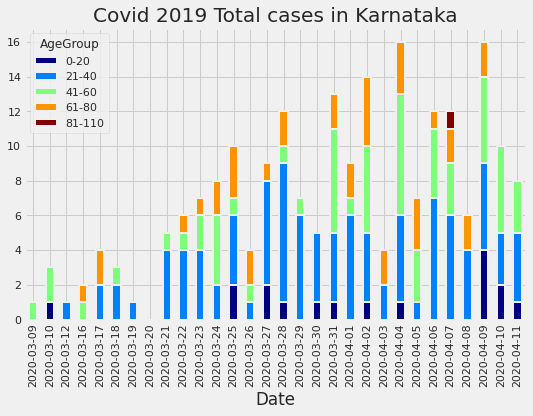

In [13]:
df_axes = df.copy()
df_axes["Age"]= df_axes["Age"].astype(int) 
bins= [0,20,40,60,80,110]
labels = ['0-20','21-40','41-60','61-80','81-110']
df_axes['AgeGroup'] = pd.cut(df_axes['Age'], bins=bins, labels=labels, right=False)
#df_axes['AgeGroup'][ df_axes.Age > 80  ] = '81-100+'
df_axes1 = df_axes.groupby(['Place','AgeGroup','Gender','Date'],as_index=False).sum()
df_axes2 = df_axes.groupby(['Discharge Date','AgeGroup','Gender','Place'],as_index=False).sum()


df_axes2['Date']=df_axes2['Discharge Date']
df_axes2.drop(['Total cases','Deaths','No of contacts','Active cases', 'Active original cases','Discharge Date','Age'], axis= 1, inplace = True)
df_axes2.set_index(['Place','AgeGroup','Gender','Date'], inplace=True)


df_axes1.drop(['Cured/Discharged/Migrated','Age'], axis= 1, inplace = True)
df_axes1.set_index(['Place','AgeGroup','Gender','Date'],inplace=True)

df_concat = pd.concat([df_axes1, df_axes2], axis=1, sort=True)
df_concat.replace(0, np.nan, inplace=True)
df_concat['Total cases'].groupby(['Date','AgeGroup']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Total cases in Karnataka')

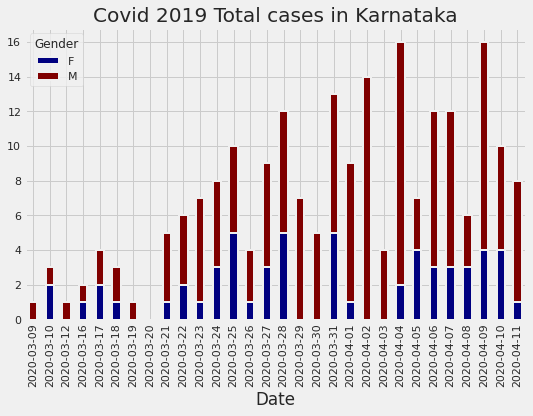

In [14]:
df_concat['Total cases'].groupby(['Date','Gender']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Total cases in Karnataka')

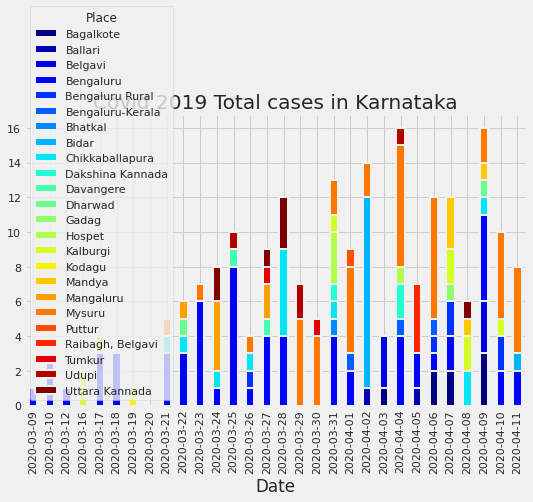

In [15]:
df_concat['Total cases'].groupby(['Date','Place']).sum().unstack().plot(kind='bar',lw=2,stacked=True, colormap='jet', title='Covid 2019 Total cases in Karnataka')

In [20]:
x = df.groupby('Place')['Active cases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Active cases
Place,
Mysuru,45
Bengaluru,44
Bidar,12
Chikkaballapura,9
Bagalkote,7
Belgavi,6
Bengaluru Rural,6
Mandya,5
Kalburgi,5
